In [1]:
import sympy as sp
from IPython.display import display, Markdown
import numpy as np

In [2]:
sp.init_session()

IPython console for SymPy 1.12 (Python 3.10.13-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.12/



In [ ]:
x = sp.symbols('v_1:5')
np.mean(x + np.ones(4)*10)

In [3]:
v = sp.symbols('v_1:5') # could also write sp.symbols('v1:5')

display(v)
display(sp.Matrix(2, 2, v).T)
display(sp.Matrix(2, 2, v))

⎡v₁  v₃⎤
⎢      ⎥
⎣v₂  v₄⎦

⎡v₁  v₂⎤
⎢      ⎥
⎣v₃  v₄⎦

In [5]:
# Define the symbols for the first row
v1 = sp.symbols("v_{11:16}")

# Define the symbols for the second row
v2 = sp.symbols("v_{21:26}")

# Create the matrix
sp.Matrix([v1, v2])

⎡v_{11}  v_{12}  v_{13}  v_{14}  v_{15}⎤
⎢                                      ⎥
⎣v_{21}  v_{22}  v_{23}  v_{24}  v_{25}⎦

In [46]:
X = sp.Symbol("X")
X+X+1

In [47]:
a,b,c, x, y = sp.symbols("a,b,c,x,y")
a*b + b*a + a*c + c*a 

In [48]:
expr = sp.factor(a**2 - b**2)
print(expr)
display(expr)
display(sp.expand(expr))

(a - b)*(a + b)


In [49]:
sp.Integral(sp.sqrt(1/a), a)

In [50]:
expr = x**2 + 2*x*y + y**2
display(expr)
display(expr.subs({x:1, y:2})) # gives 9
display(expr.subs({x:y-1}))
display(sp.simplify(expr.subs({x:y-1})))

In [51]:
expr1 = input("Input first expression")
expr2 = input("Input second expression")

try:
    expr1 = sp.sympify(expr1)
    expr2 = sp.sympify(expr2)

    display(sp.expand(expr1 * expr2))    
except sp.SympifyError:
    print("Invalid input")

# Input first expression x*2 + y
# Input second expression x*3 + y
# 6*x**2 + 5*x*y + y**2

Invalid input


In [52]:
x, y, z = sp.symbols("x y z")
q = x**2 - 2*x + 7

# solve quadratic equation
display(sp.solve(q))

# solve for 1 var instead of the other
q = x ** 2 + y * x + z
res = sp.solve(q, x)
display(res)

# compute for a pair of values
display([ret.subs({y:2, z:7}) for ret in res])


In [53]:
eq = sp.sin(x) + y + z
ret = sp.solve(eq, x)
display(ret)
display([r.subs({y:0.4, z:-0.3}) for r in ret])

In [54]:
# System of linear equations
e1 = 2 * x - 3 * y + 1
e2 = 4 * x + 2 * y - 3
sp.solve((e1, e2))

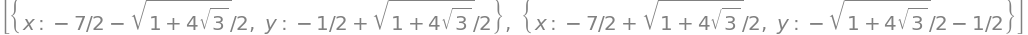

In [55]:
# System of non-linear equations
e1 = 4 + x + y
e2 = x * y + 3 * y + sp.sqrt(3)
sp.solve((e1, e2))

solving inequality more complex, see https://docs.sympy.org/dev/modules/solvers/inequalities.html

In [56]:
A, B = sp.symbols('A B', commutative=False)
print(A * B == B * A)

False


In [57]:
%matplotlib inline

$$ \lim_{x \to \infty}\left(\frac{\sin{\left(x \right)}}{x}\right) \; \Longrightarrow \; 0 $$

$$ \lim_{x \to 0^-} \frac{1}{x} \; \Longrightarrow \; -\infty $$

$$ \lim_{x \to \infty} \left(1 + \frac{1}{x}\right)^{x} \; \Longrightarrow \; e $$

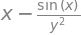

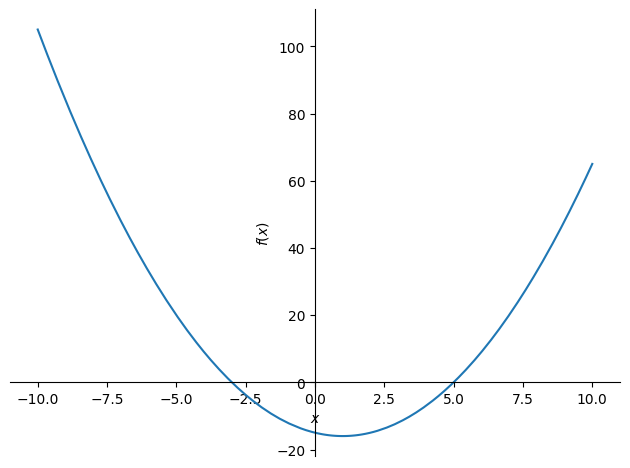

In [58]:
x, y, z = sp.symbols('x y z')

## Limits
eqs = [sp.Limit(sp.sin(x)/x, x, sp.S.Infinity), 
       sp.Limit(1/x, x, 0, dir='-'), 
       sp.Limit((1 + 1/x) ** x, x, sp.S.Infinity)]
for eq in eqs:
    display(Markdown((f"$$ {sp.latex(eq)}"
                      " \; \Longrightarrow \; "
                       f"{sp.latex(eq.doit())} $$")))

## Derivative
display(sp.Derivative(sp.sin(x) ** 2 + 2 * x ** 2, x).doit())

# Partial derivative
display(sp.Derivative(sp.sin(x) / y + y * x, y).doit())

# Finding maximum and minimum (critical points)
display(sp.solve(sp.Derivative(x**2 - 2*x - 15, x).doit()))

sp.plot(x**2 - 2*x - 15)


$$\Large
\text{R}: \frac{v^{2} \sin{\left(t \right)}}{g} \\[0.1in]
\text{R\_deriv}: \frac{v^{2} \cos{\left(t \right)}}{g}
$$


$$\Large \text{R\_deriv}  \left[ \frac{\pi}{2}, \  \frac{3 \pi}{2}\right] $$

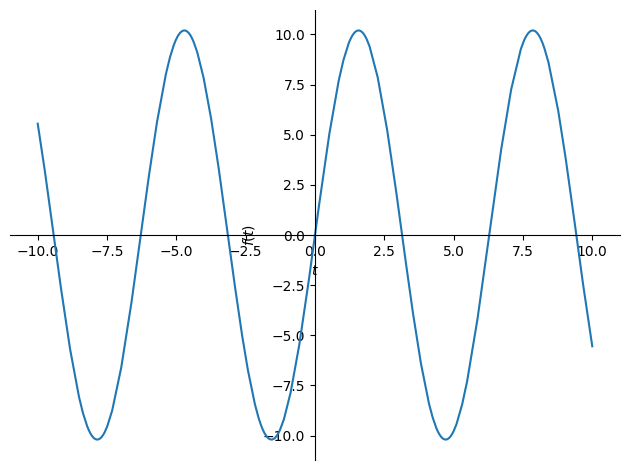

Integrals - no interval:


Integrals - with interval


In [59]:
# For equations of motion - throwing a ball at an angle theta, with velocity V, we find the range R
theta = sp.Symbol('t')
v = sp.Symbol('v')
g = sp.Symbol('g')
R = v**2 * sp.sin(theta) / g

R_deriv = sp.Derivative(R, theta).doit() # alternative is R.diff(theta)
md = f"""
$$\\Large
\\text{{R}}: {sp.latex(R)} \\\[0.1in]
\\text{{R\_deriv}}: {sp.latex(R_deriv)}
$$
"""
display(Markdown(md))

ans = sp.solve(R_deriv, theta)
display(Markdown(f"$$\\Large \\text{{R\_deriv}}  {sp.latex(ans)} $$"))

sp.plot(R.subs({v:10, g:9.81})) # just to have a graphical plot of the distance

# Integrals - no interval
print("Integrals - no interval:")
display(sp.Integral(sp.sin(x) * x, x).doit())

# Integrals - with interval
print("Integrals - with interval")
display(sp.Integral(sp.sin(x) * x, (x, 0, 1)).doit())

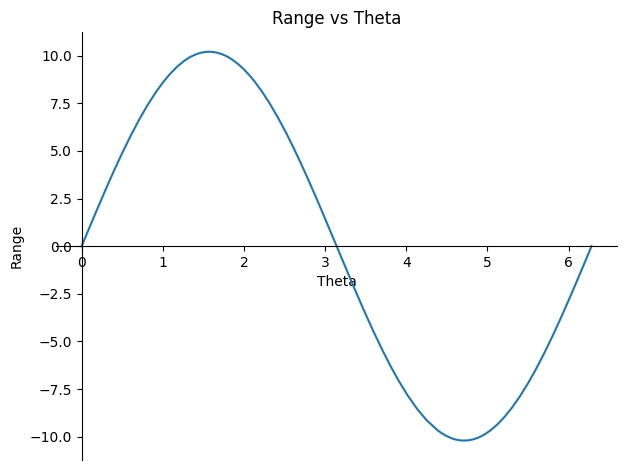

In [60]:
sp.plot(R.subs({v:10, g:9.8}), 
        (theta, 0, 2*sp.pi), 
        ylabel='Range', xlabel='Theta', 
        title='Range vs Theta')

In [61]:
# Define text with LaTeX for size adjustment
markdown_text = f"""
$$
\\text{{The partial\_derivative of the given expression with respect to }} \\theta \\text{{ is: }} \\\\ \\\\
\\Large {sp.latex(R_deriv)}
$$
"""

# Display the result with additional text and adjusted size
display(Markdown(markdown_text))



$$
\text{The partial\_derivative of the given expression with respect to } \theta \text{ is: } \\ \\
\Large \frac{v^{2} \cos{\left(t \right)}}{g}
$$


In [62]:
# create a matrix with sympy using symbols a b c d e f g
a, b, c, d, e, f, g = sp.symbols('a b c d e f g')
A = sp.Matrix([[1, 0, 0, a], 
               [0, 1, 0, b], 
               [0, 0, 1, c],
               [0, 0, 0, 1]])
B = sp.Matrix([[d, 0, 0, 0], 
               [0, e, 0, 0], 
               [0, 0, f, 0],
               [0, 0, 0, 1]])

display(sp.Matrix(2, 2, [1, 2, 3, 4]))
display(A*B)
display((A*B).inv())


⎡1  2⎤
⎢    ⎥
⎣3  4⎦

⎡d  0  0  a⎤
⎢          ⎥
⎢0  e  0  b⎥
⎢          ⎥
⎢0  0  f  c⎥
⎢          ⎥
⎣0  0  0  1⎦

⎡1        -a ⎤
⎢─  0  0  ───⎥
⎢d         d ⎥
⎢            ⎥
⎢   1     -b ⎥
⎢0  ─  0  ───⎥
⎢   e      e ⎥
⎢            ⎥
⎢      1  -c ⎥
⎢0  0  ─  ───⎥
⎢      f   f ⎥
⎢            ⎥
⎣0  0  0   1 ⎦